<a href="https://colab.research.google.com/github/sourav263/LGMVIP/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
     

train   =   pd.read_csv('train.csv')
test    =   pd.read_csv('test.csv')
members =   pd.read_csv('members.csv')
songs   =   pd.read_csv('song_extra_info.csv')
     

train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
train = train.sample(frac=0.01)
     

train = pd.merge(train, songs, on='song_id', how='left')
     

train.head()
     


,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc
0,J1yDcZC4HcVu0iDwCEC/d+j2kYEfRIDObYJwvwziDhI=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,discover,Online playlist more,online-playlist,1.0,NaN,NaN
1,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,caXQoad48M9jS7s0V227KI5i0HnARffYKOxe0fYVtrM=,my library,Local playlist more,local-playlist,1.0,NaN,NaN
2,rr4UgAoJj0ry3aAo7SJy6RZy8psI9aPwgIQiA1cu39Q=,0vHg1i5m+5MD19Cp5BK8Ox5slqW4rVSdBqifyC37pyA=,my library,Local playlist more,local-library,1.0,NaN,NaN
3,uQ6LOBwmu7lIjv+wFaq5+M4IcAZEha2J0uyDB6Y8aqY=,oFSMr/3vXEiloTKC2s2fjR6DxSOu5AY4W7kVF1z5TG8=,discover,Online playlist more,online-playlist,0.0,NaN,NaN
4,D7h/xx2i04n3YAB8Ragzk3uqQ25ZC81WowNXTYiEzkU=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,discover,Discover Chart,online-playlist,1.0,NaN,NaN


In [ ]:
train = pd.merge(train, members, on='msno', how='left')
train.shape
     


train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    234 non-null    object 
 1   song_id                 234 non-null    object 
 2   source_system_tab       234 non-null    object 
 3   source_screen_name      228 non-null    object 
 4   source_type             234 non-null    object 
 5   target                  234 non-null    float64
 6   name                    27 non-null     object 
 7   isrc                    26 non-null     object 
 8   city                    234 non-null    int64  
 9   bd                      234 non-null    int64  
 10  gender                  147 non-null    object 
 11  registered_via          234 non-null    int64  
 12  registration_init_time  234 non-null    int64  
 13  expiration_date         234 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory 

In [ ]:
np.mean(train.target)
     


null_check = train.isnull()
     

print((null_check.sum()/null_check.count())*100)

msno                       0.000000
song_id                    0.000000
source_system_tab          0.000000
source_screen_name         2.564103
source_type                0.000000
target                     0.000000
name                      88.461538
isrc                      88.888889
city                       0.000000
bd                         0.000000
gender                    37.179487
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [ ]:
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
    
train = train.fillna(value=0)
     

train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,J1yDcZC4HcVu0iDwCEC/d+j2kYEfRIDObYJwvwziDhI=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,discover,Online playlist more,online-playlist,1.0,unknown,unknown,22,26,female,9,20070916,20171009
1,2L3q6ZAEugqLjChoSRbv/cCWX7jXAg+a2IFRDl7wQz4=,caXQoad48M9jS7s0V227KI5i0HnARffYKOxe0fYVtrM=,my library,Local playlist more,local-playlist,1.0,unknown,unknown,1,0,unknown,7,20130807,20171001
2,rr4UgAoJj0ry3aAo7SJy6RZy8psI9aPwgIQiA1cu39Q=,0vHg1i5m+5MD19Cp5BK8Ox5slqW4rVSdBqifyC37pyA=,my library,Local playlist more,local-library,1.0,unknown,unknown,15,35,female,3,20141010,20180204
3,uQ6LOBwmu7lIjv+wFaq5+M4IcAZEha2J0uyDB6Y8aqY=,oFSMr/3vXEiloTKC2s2fjR6DxSOu5AY4W7kVF1z5TG8=,discover,Online playlist more,online-playlist,0.0,unknown,unknown,13,36,female,3,20141104,20170920
4,D7h/xx2i04n3YAB8Ragzk3uqQ25ZC81WowNXTYiEzkU=,J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=,discover,Discover Chart,online-playlist,1.0,unknown,unknown,1,0,unknown,7,20131011,20171017


In [ ]:


for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
     

for i in train.select_dtypes(include=['category']).columns:
    train[i] = train[i].cat.codes
     

from sklearn.model_selection import train_test_split
     

X_train = train.drop(['target'], axis = 1).values
y_train = train['target'].values
     

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)
     

from sklearn.ensemble import RandomForestClassifier
     

rfc = RandomForestClassifier(n_estimators=250)
     

rfc.fit(X_train,y_train)
     

RandomForestClassifier(n_estimators=250)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
     

rfc_pred = rfc.predict(X_test)
     

print(confusion_matrix(y_test,rfc_pred))

[[ 6 14]
 [ 2 49]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.30      0.43        20
         1.0       0.78      0.96      0.86        51

    accuracy                           0.77        71
   macro avg       0.76      0.63      0.64        71
weighted avg       0.77      0.77      0.74        71



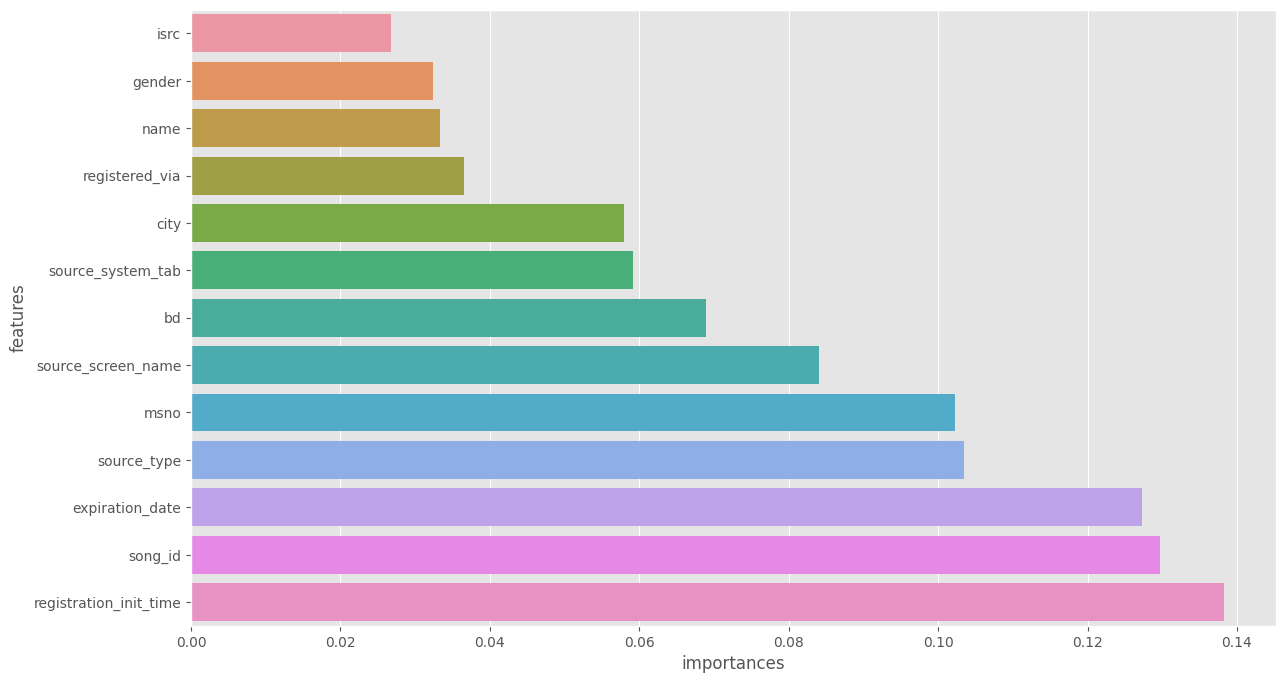

In [ ]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': rfc.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')